Inicialización

In [169]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)  
pd.set_option("display.max_rows", None)   

1. Abrir el archivo de datos y estudiar la información general

In [170]:
ice = pd.read_csv(r"C:\Users\jonat\Desktop\DATA_SCIENTIST\SPRINT_6\games.csv")
print(ice.columns)
ice.info()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Puedo observar que hay demasiados valores faltantes, y usando .nuique(), en cada columna ej: print(ice['Name'].nunique()), sabemos que tenemos 11559 valores unicos de 16713 entradas de 16715 registros e sdecir debemos homologar todas las columnas para evitar datos repetidos y asi homologar todos los datos

2. Preparar los datos

2.1 Reemplazar los nombres de las columnas (minusculas) y homologar nombres de la columna name

Uso re en este caso sub, para poder homologra todos los nombres de la columna name , es decir conservo solamente los caracteres que sean letras y numeros para poder realizar un concatenado y asi poder determinar los valores unicos y quito los espacios para ejecutar de correcta forma el concatenado, mas adelante sera mas facil poder espaciar los nombres y se puede reinvertir el concatenado con re.findall

In [171]:
ice.columns = ice.columns.str.lower()
print(ice.columns)    

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [182]:
def normalizar_nombre(nombre):
    if nombre is None or pd.isna(nombre): 
        return ""
    nombre = nombre.lower()
    nombre = re.sub(r'[^a-z0-9]', '', nombre)
    return nombre

ice['name'] = ice['name'].apply(normalizar_nombre)

2.2 Convertir los datos en tipos necesarios

In [173]:
ice['year_of_release'] = ice['year_of_release'].fillna(0)
ice['year_of_release'] = ice['year_of_release'].astype(int)
ice['critic_score'] = ice['critic_score'].fillna(0)
ice['critic_score'] = ice['critic_score'].astype(int)
ice['user_score'] = ice['user_score'].fillna(0)

In [174]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


2.3 Describo las columnas en las que los tipos de datos han sido cambiados y explico por qué.

-year_of_release, de tipo flotante a tipo entero ya que los años todos demostraban numeros enteros y es mas practico y facil ahcer comparaciones y segmanetar datos de esta manera.

-critic_score, de tipo flotante a tipo entero ya que al ser una rango de 0 - 100 es posible el poder hacer comparaciones y segmentar logiucamente con ese rango de valores

-en la paret de completar datos con fillna(0), par apoder determianr los valores ausentes con numeros ceros y asi poder realñizar las converisones de tipos de datos, sin embargo para user_score aun dejamos el tipo de datos object por que existe una categoria tbd



2.4 Manera de tratar valores ausentes

In [175]:
print(ice['name'].isna().sum())
print(ice[ice['name'].isna()])
ice = ice.dropna(subset=['name'])
print(ice['name'].isna().sum())
print(ice['genre'].isna().sum())
print(ice[ice['genre'].isna()])
ice = ice.dropna(subset=['genre'])
print(ice['genre'].isna().sum())
ice.info()

0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
0
2
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659             GEN             1993   NaN      1.78      0.53      0.00   
14244           GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08             0          0    NaN  
14244         0.00             0          0    NaN  
0
<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         167

2.4.1 Explicación de rellenmo de valores ausentes y que realice con ellos

Decidi eliminar las filas completas que en la columna name estuvieran vacias ya que no pude buscar una relacion directa con datos similares para poder definir a esas dos entradas un nombre de un regitro ya asignado por lo que para un analisis mas exacto es mejor eliminarlas y no seguir trabajando con ellas, tampoco son mucha spero mejor me ahorro porblemas continuando manejando esas dos filas con valores nulos en name

In [183]:
#Hago el conteo de los valores iguales a cero en estas columnas ya que son numericas
#Esto demuestra los valores ausentes
print((ice['year_of_release'] == 0).sum(),
    (ice['na_sales'] == 0).sum(),
    (ice['eu_sales'] == 0).sum(),
    (ice['jp_sales'] == 0).sum(),
    (ice['other_sales'] == 0).sum(),
    (ice['critic_score'] == 0).sum(),
    (ice['user_score'] == 0).sum(),
    sep=", ")
#Ahora los valores unicos
print(ice['name'].nunique(),
    ice['platform'].nunique(),
    ice['year_of_release'].nunique(),
    ice['genre'].nunique(),
    ice['na_sales'].nunique(),
    ice['eu_sales'].nunique(),
    ice['jp_sales'].nunique(),
    ice['other_sales'].nunique(),
    ice['critic_score'].nunique(),
    ice['user_score'].nunique(),
    ice['rating'].nunique(),
    sep=", "
)

269, 4507, 5869, 10513, 6600, 8576, 9136
11524, 31, 38, 12, 402, 307, 244, 155, 83, 10, 9


2.4.2 ¿Por que creo que los valores están asuentes?

Rellene los valores ausentes con 0 para las columnas de tipo de valores entero y tipo flotante, igual ya verifique cuantos valores por columna son unicos, lo que puede significar que tenemos 11559 nombres unicos de videojuegos, (sin embargo creo que puede haber repetidos, es decir con espacios, mayusculas , puntos, etc, por lo que mas adelante sera mejor agruparlos por valores unicos y sumarlos para unicamente tener valores unicos), lo mismo con los 31 valores unicos de plataforma, ahora en años de lanzamiento , 38 años unicos, y hay 269 valores sin registro de lanzamiento, en ventas hay demasiados valores ausentes lo que puede signifiacr que no hay ventas y esos sondatos importantes pero faciles de interpretar como ventas en cero, en critic score, y  user score lo tranforme a entero sin embargo lo mejor seria etablecer ambos en un rango de 0 a 100 o en un rango de 0 a 10 ya que en user score la mantuve en object ya que exite el dato tbd, y creo que lo optimo para manejar este valor seria manejarlo con NaN, es decir valor ausnete ay que aun no tenemos valores y si le asigmanos un valor cercano a la emdia o incluso la media puede afectar a relaciones estadisticas, por ello lo mejor a mi parecer es manejarlo con NaN

2.4.3 Prestar atención a la abreviatura TBD, to be determined (Especifica como piensas manejar estos casos)

Lo voy a menjar como valores vacios es decir los voy a transformar a cero ya que son valores ausentes por que aun no estan definidos y puede ser por que aun no hay demasiadas reseñas , por lo que cambiare a cero y convertire a int esa categoria

In [177]:
ice['user_score'] = ice['user_score'].replace('tbd', 0).astype(float)
ice['user_score'] = ice['user_score'].astype(int)
ice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


2.4.4 Examinar los datos de la columna rating y poder determianr como los manejamos para poder terminar de corregir los datos y sobre todo el dataframe para poder tener las 16713 lineas completas es decir sin datos faltantes, determinamos los valores NaN de la columna Rating con U, lo que signifa Unknown, es decir sin conocimiento de los valores, ya que no represnta una clasificaion:E = Everyone (para todos); T = Teen (adolescentes); M = Mature (adultos); AO = Adults Only; EC = Early Childhood

In [178]:
# Reemplazar NaN en la columna 'rating' con la letra 'U'
ice['rating'] = ice['rating'].fillna('U')

Esto significa que ya tenemos todo el dataframe con valores manejable y listos para comenzar analisis mas profundos

In [179]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  int64  
 10  rating           16713 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


2.5 Calcular las ventas totales ( la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada

In [184]:
ice['ventas_totales'] = (
    ice['na_sales'] +
    ice['eu_sales'] +
    ice['jp_sales'] +
    ice['other_sales']
)
print(ice[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'ventas_totales']].head())

                    name  na_sales  eu_sales  jp_sales  other_sales  \
0              wiisports     41.36     28.96      3.77         8.45   
1         supermariobros     29.08      3.58      6.81         0.77   
2           mariokartwii     15.68     12.76      3.79         3.29   
3        wiisportsresort     15.61     10.93      3.28         2.95   
4  pokemonredpokemonblue     11.27      8.89     10.22         1.00   

   ventas_totales  
0           82.54  
1           40.24  
2           35.52  
3           32.77  
4           31.38  


Ahora si pasamos al analisis de datos:

3. Analiza los datos

3.1 Mira cuántos juegos fueron lanzados en diferentes años.

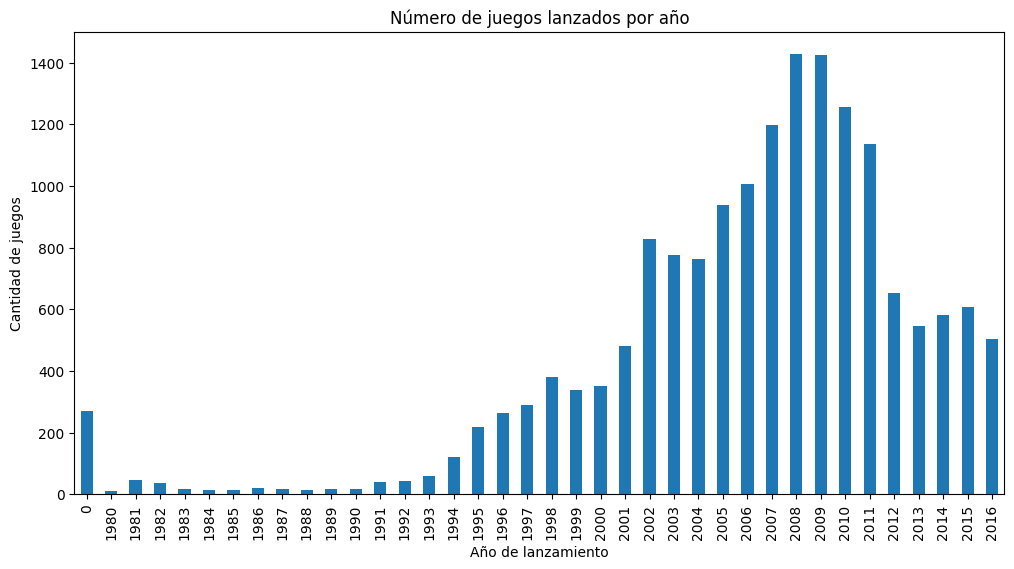

In [ ]:
lanzamientos_por_año = ice.groupby('year_of_release')['name'].count()
plt.figure(figsize=(12,6))
lanzamientos_por_año.plot(kind='bar')
plt.title("Número de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.show()

3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.



In [ ]:
ventas_totales = ice.groupby('platform')['ventas_totales'].sum()
primer_año = ice.groupby('platform')['year_of_release'].min()
ultimo_año = ice.groupby('platform')['year_of_release'].max()

resumen_plataformas = pd.DataFrame({
    'ventas_totales': ventas_totales,
    'primer_año': primer_año,
    'ultimo_año': ultimo_año
})

resumen_plataformas = resumen_plataformas.sort_values(by='ventas_totales', ascending=False)
resumen_plataformas

,ventas_totales,primer_año,ultimo_año
platform,,,
PS2,1255.77,0,2011
X360,971.42,0,2016
PS3,939.65,0,2016
Wii,907.51,0,2016
DS,806.12,0,2013
PS,730.86,0,2003
GBA,317.85,0,2007
PS4,314.14,2013,2016
PSP,294.05,0,2015


Aqui podemos determinar cuales son las plataformas con mayor venta, de que año fue el primer lanzamiento así como cual fue el ultimo año de lanzamiento lo que representa , que tomaremos en cuenta es que varias plataformas tiene primer año 0 esto indica que falta informacion sobre el año de lanzamiento, las plataformas clasicas termina sus lanzamientos alrededor de los años 90 o 2000, unas plataformas recientes tienen datos desde 2012 -2013 hasta 2016, lo que representa que nuevas plataformas tardar de 1 a 3 años en alcanzar ventas y antiguas de 5 a 10 años antes de desaparecer




In [ ]:
datos_modelo = ice[(ice['year_of_release'] >= 2000) & (ice['year_of_release'] <= 2015)]
datos_modelo.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ventas_totales
10656,nbaballersrebound,PSP,2006,Sports,0.09,0.00,0.00,0.01,69,7,E,0.10,0.10
5553,onepieceromancedawnboukennoyoake,PSP,2012,Fighting,0.00,0.00,0.32,0.00,0,0,U,0.32,0.32
10421,gravitygamesbikestreetvertdirt,PS2,2002,Sports,0.05,0.04,0.00,0.01,24,4,T,0.10,0.10
3483,skateit,Wii,2008,Sports,0.50,0.03,0.00,0.04,70,8,E,0.57,0.57
3467,fifasoccer10,DS,2009,Sports,0.14,0.37,0.00,0.07,0,7,E,0.58,0.58


Elegi datos relevantes para el modelo del año 2000 a 2015 ya que pueden tener mejor relacion para futuras predicicones al 2017, y podemos ya poner datos en mejor forma para vectores si es que quisieramos estimar predicciones usando un modelo matemático simple y no tan complejo basado en pendientes como regresiones lineales, para lo cual usariamos una libreria es decir, sklear.linear_model e importando para LinearRegression y despues contruir los vectores para poder maejar las operaciones con matrices.

In [ ]:
# Filtrar años representativos para entrenar modelo 2017
datos_relevantes = ice[(ice['year_of_release'] >= 2000) & (ice['year_of_release'] <= 2015)]
datos_relevantes.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
6771,jikkyoupowerfulproyakyuu2001,PS,2001,Sports,0.00,0.00,0.23,0.02,0,0,U,0.25
10039,heartcatchprecureosharecollection,DS,2010,Action,0.00,0.00,0.11,0.00,0,0,U,0.11
7286,afrika,PS3,2008,Adventure,0.12,0.00,0.08,0.01,63,6,E10+,0.21
8779,projectsylpheedarcofdeception,X360,2006,Shooter,0.12,0.01,0.02,0.01,64,8,T,0.16
2550,finalfantasyxiwingsofthegoddess,PS2,2007,Role-Playing,0.35,0.27,0.09,0.09,0,0,T,0.80


3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


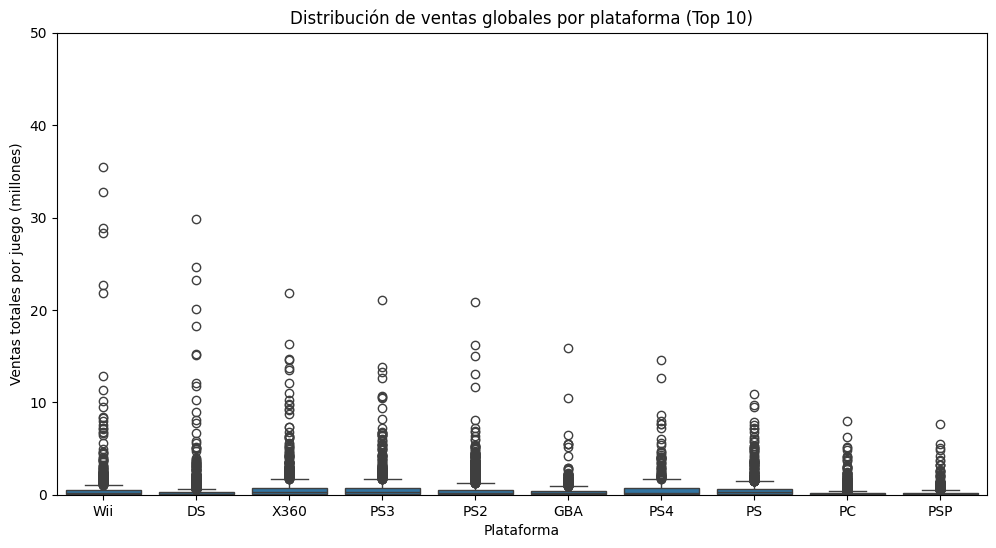

In [185]:
top_plataformas = ice.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).head(10).index
datos_top = ice[ice['platform'].isin(top_plataformas)]

# Diagrama de caja
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='ventas_totales', data=datos_top)
plt.ylim(0, 50)
plt.title("Distribución de ventas globales por plataforma (Top 10)")
plt.xlabel("Plataforma")
plt.ylabel("Ventas totales por juego (millones)")
plt.show()

Tenemos demasiado valores atipicos, y una media no grande en diferentes plataformas por ejemplo PS4 tiene un comportamiento en Q mas regular y con valores atipicos agrupados

3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

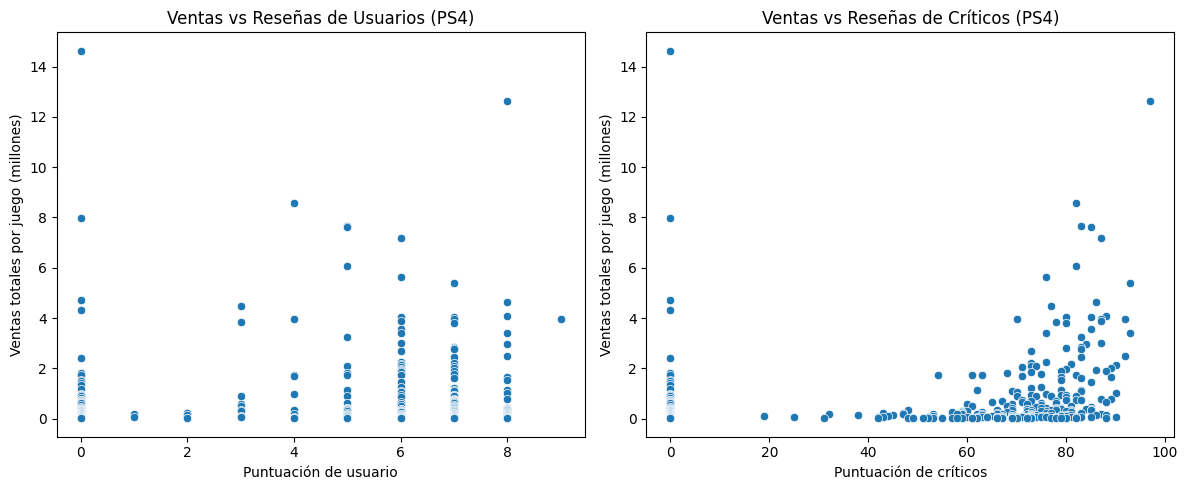

Correlación ventas vs reseñas de usuarios: 0.11
Correlación ventas vs reseñas de críticos: 0.23


In [186]:
#Ejemplo PS4
ps4_data = ice[ice['platform'] == 'PS4']

#Grafico de dispersión ventas vs reseñas:
#usuarios
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='user_score', y='ventas_totales', data=ps4_data)
plt.title("Ventas vs Reseñas de Usuarios (PS4)")
plt.xlabel("Puntuación de usuario")
plt.ylabel("Ventas totales por juego (millones)")

#criticos
plt.subplot(1,2,2)
sns.scatterplot(x='critic_score', y='ventas_totales', data=ps4_data)
plt.title("Ventas vs Reseñas de Críticos (PS4)")
plt.xlabel("Puntuación de críticos")
plt.ylabel("Ventas totales por juego (millones)")

plt.tight_layout()
plt.show()

#correlación entre ventas y reseñas:
corr_user = ps4_data['ventas_totales'].corr(ps4_data['user_score'])
corr_critic = ps4_data['ventas_totales'].corr(ps4_data['critic_score'])
print(f"Correlación ventas vs reseñas de usuarios: {corr_user:.2f}")
print(f"Correlación ventas vs reseñas de críticos: {corr_critic:.2f}")

3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


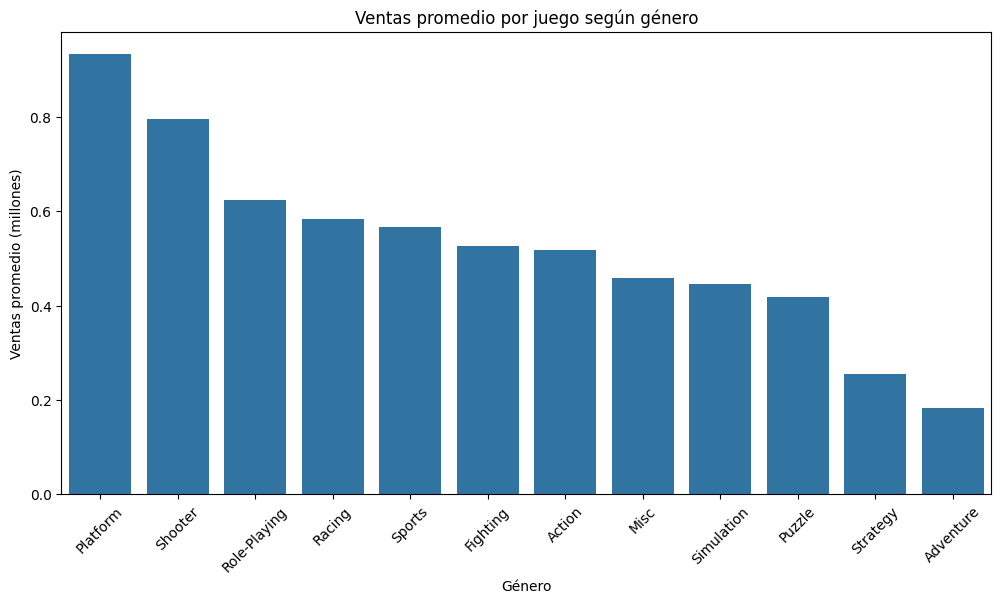

In [188]:
ventas_genero = ice.groupby('genre')['ventas_totales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=ventas_genero.index, y=ventas_genero.values)
plt.xticks(rotation=45)
plt.title("Ventas promedio por juego según género")
plt.xlabel("Género")
plt.ylabel("Ventas promedio (millones)")
plt.show()


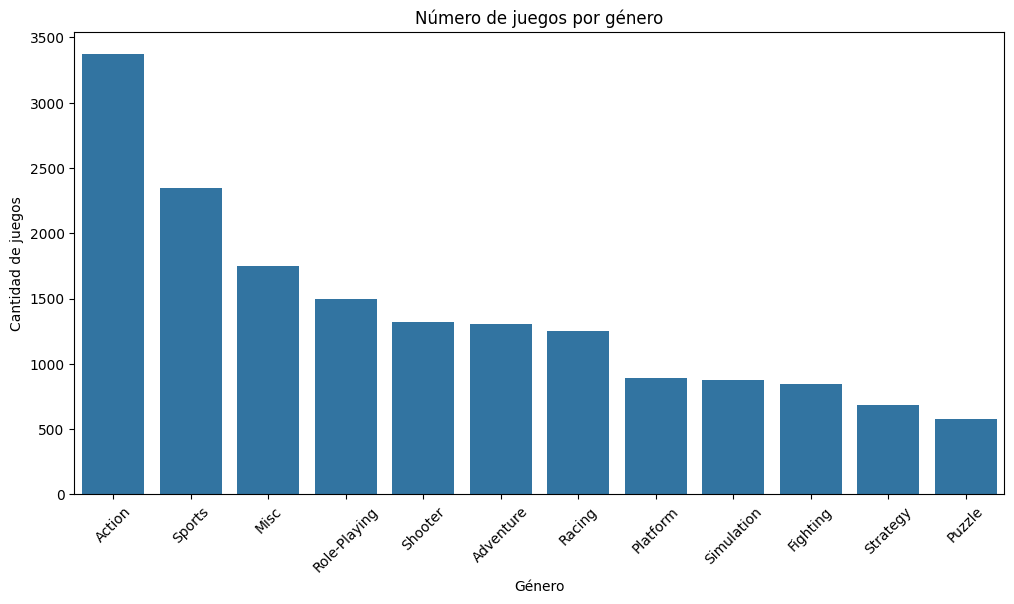

In [189]:
genero_counts = ice['genre'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genero_counts.index, y=genero_counts.values)
plt.xticks(rotation=45)
plt.title("Número de juegos por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de juegos")
plt.show()


4. Crea un perfil de usuario para cada región


4.1 Para cada región (NA, UE, JP) determina:    

4.1.1  Las cicno plataformas principales. Describe las variaciones en sus costos de mercado de una región a otra

In [190]:
top_platforms_NA = ice.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_EU = ice.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_JP = ice.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas NA:\n", top_platforms_NA)
print("\nTop 5 plataformas UE:\n", top_platforms_EU)
print("\nTop 5 plataformas JP:\n", top_platforms_JP)


Top 5 plataformas NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas UE:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


4.1.2 Los cinco géneros principales. Explica la diferencia.

In [191]:
top_genres_NA = ice.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_EU = ice.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_JP = ice.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros NA:\n", top_genres_NA)
print("\nTop 5 géneros UE:\n", top_genres_EU)
print("\nTop 5 géneros JP:\n", top_genres_JP)


Top 5 géneros NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros UE:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


4.1.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [195]:
esrb_sales = ice.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().sort_values(by='na_sales', ascending=False)

print("Ventas por clasificación ESRB:\n", esrb_sales)


Ventas por clasificación ESRB:
         na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
U        1240.68    613.30    841.93
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
K-A         2.56      0.27      1.46
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
RP          0.00      0.08      0.00


5. Prueba las siguientes hipótesis

5.1 — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [198]:
xone_scores = ice.loc[ice['platform'] == 'XOne', 'user_score']
pc_scores   = ice.loc[ice['platform'] == 'PC', 'user_score']

print("Media XOne:", xone_scores.mean())
print("Media PC:", pc_scores.mean())

results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
print("valor-p:", results.pvalue)

alpha = 0.5

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.")



Media XOne: 4.502024291497976
Media PC: 5.2217659137577
valor-p: 0.0007016411543542438
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


5.2 — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [199]:
accion_scores = ice.loc[ice['genre'] == 'Action', 'user_score']
deportes_scores = ice.loc[ice['genre'] == 'Sports', 'user_score']

print("Media Acción:", accion_scores.mean())
print("Media Deportes:", deportes_scores.mean())

alpha = 0.05

results = st.ttest_ind(accion_scores, deportes_scores, equal_var=False)
print("valor-p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.")


Media Acción: 3.593647966755714
Media Deportes: 3.0545144804088586
valor-p: 6.095719434232464e-09
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


5.3 — Cómo formulaste las hipótesis nula y alternativa.

Empezamos con una hipotesis nula H0, si no hay diferencia real entre las calificaciones promedio y la hipotesis alternativa H1 si es que hay una diferencia real entre las calificaiones promedio, elegi un nivel de confianza de 0.05, y en pocas palabras comparamos las calificaciones, suponemos que no hay diferencia y la prueba nos dice si podemos rechazar la suposicion o no


5.4 — Qué criterio utilizaste para probar las hipótesis y por qué.

Compare las calificaciones promedio de los dos grupos usando una pruab estadistica prueba t, y basicamente este criterio para poder ver si la diferencia observada es significativa o puede ser producto del azar

6. Escribe una conclusión general:

 Primero el rellenar dtaos y poder estimar ciertos criterios es algo que debe llevar una estructuras ay que fue necesario el poder pensar el como podia manipular los datos que yo defina en un inicio para unas pruebas tanto para proyecciones usando capas o simplemente sumas estandar, el ver que representan los valores ausentes y que pueden significar para analisis futuros.

 Despues el ver con graficos y el ordenar lso datos para poder determinar mayores ventas, plataformas y generos, definir un rango en años y despue spoder clasificarlos por continentes , sin tomar en cuenta los otros , es decir solo los principales, por otro lado el quitar los valores de nombre y tratar de usar llaves unicas de concatenado no fue necesario ya que no se hizo ningun analisis por nombre sin emabrgo si es posible con esta estructura de datos 

 Para la parte de genero y plataforma puedo definir como los 5 principales generos son Platform, Shooter, Role- Playing, Racing y Sports, lo que define los gustos de los ususarios, en la parte de nuemros Action, Sports, Misc, Role-Playing, Shooter, puedo definir cuales con juegos que mas crean por genero y buscar una relacion mayor cuadrando con ventas para poder realizar un analisis financiero, y combinado a una proyeccin con regresion linear puedo estimar las ventas a futuro para el 2017 y asi poder determinar mayores generos y mayor numeros de juegos a crear o las tendencias del mercado en ese año.

 Para las prubas de hipotesis al ser simples se hacen mediante pruebas estadisticas t, lo que representa muestras con relacion estadisitica o si son del azar ya que e sposible que los valores ausentes puedsan influir en estas pruebas.

 Ahora estas tendencias si cumplen un comportamiento que igual tiene bases fundamentales tanto el las reseñas de los usuarios como en las reseñas de datos criticos, esto determina que si influye en las venta de juegos.

 Así que esto solo arroja resultados de tendencia sin ningun estimado a futuro, lo que nos d auna idea de los videojuegos, plataforma, generos, y sobre todo el como inlfuyen las criticas escalados a las diferentes regiones del mundo.


